## Microsoft : Classifying Cybersecurity Incidents with Machine Learning

**File Path**

In [5]:
Train_Dataset = r"C:\Users\HP\OneDrive\Desktop\Microsoft_ML\GUIDE_Train.csv.zip" # Training Dataset 
Test_Dataset = r"C:\Users\HP\OneDrive\Desktop\Microsoft_ML\GUIDE_Test.csv.zip" # Testing Dataset

*Training Dataset Overview*

In [14]:
import pandas as pd

# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(Train_Dataset, chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("Column Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())

First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersio

In [18]:
import pandas as pd

# Constants for configuration
CHUNK_SIZE = 500_000  # Chunk size for memory efficiency

# Function to downcast numeric columns to optimize memory usage
def optimize_memory(df_chunk):
    for col in df_chunk.select_dtypes(include=['int64', 'float64']).columns:
        df_chunk[col] = pd.to_numeric(df_chunk[col], downcast='integer')
    return df_chunk

def load_dataset_in_chunks(file_path, chunk_size=CHUNK_SIZE):
    """Load dataset in chunks to handle large files and optimize memory."""
    chunks = []
    try:
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False, compression='zip'):
            optimized_chunk = optimize_memory(chunk)
            chunks.append(optimized_chunk)
        df = pd.concat(chunks, ignore_index=True)
        del chunks  # Free up memory
        return df
    except FileNotFoundError as e:
        print(f"Error: The file {file_path} was not found.")
        raise e

def main(file_path):
    # Load and optimize the dataset
    df = load_dataset_in_chunks(file_path)
    
    # Display dataset preview and basic information
    print("First Few Rows of the Dataset:")
    print(df.head())
    
    print("\nShape of the dataset:", df.shape)
    
    print("\nData types of each column:")
    print(df.dtypes)
    
    print("\nColumn Names in the Dataset:")
    print(df.columns.tolist())  # Use .tolist() for cleaner output
    
    print("\nDataset Information:")
    df.info()  # Automatically prints non-null counts and data types
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing values:")
    print(missing_values[missing_values > 0])  # Display only columns with missing values
    
    # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows in the dataset:", duplicate_count)
    
    # Analyze target variable distribution
    if 'IncidentGrade' in df.columns:
        print("\nTarget variable distribution:")
        print(df['IncidentGrade'].value_counts())
    else:
        print("\nWarning: 'IncidentGrade' column not found in the dataset.")

# Example usage
if __name__ == "__main__":
    main(Train_Dataset)


First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersio

In [19]:
import pandas as pd

# Constants for configuration
CHUNK_SIZE = 500_000  # Chunk size for memory efficiency

# Function to downcast numeric columns to optimize memory usage
def optimize_memory(df_chunk):
    for col in df_chunk.select_dtypes(include=['int64', 'float64']).columns:
        df_chunk[col] = pd.to_numeric(df_chunk[col], downcast='integer')
    return df_chunk

def load_dataset_in_chunks(file_path, chunk_size=CHUNK_SIZE):
    """Load dataset in chunks to handle large files and optimize memory."""
    chunks = []
    try:
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False, compression='zip'):
            optimized_chunk = optimize_memory(chunk)
            chunks.append(optimized_chunk)
        df = pd.concat(chunks, ignore_index=True)
        del chunks  # Free up memory
        return df
    except FileNotFoundError as e:
        print(f"Error: The file {file_path} was not found.")
        raise e

def main(file_path):
    # Load and optimize the dataset
    df = load_dataset_in_chunks(file_path)
    
    # Display dataset preview and basic information
    print("First Few Rows of the Dataset:")
    print(df.head())
    
    print("\nShape of the dataset:", df.shape)
    
    print("\nData types of each column:")
    print(df.dtypes)
    
    print("\nColumn Names in the Dataset:")
    print(df.columns.tolist())  # Use .tolist() for cleaner output
    
    print("\nDataset Information:")
    df.info()  # Automatically prints non-null counts and data types
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing values:")
    print(missing_values[missing_values > 0])  # Display only columns with missing values
    
    # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows in the dataset:", duplicate_count)
    
    # Analyze target variable distribution
    if 'IncidentGrade' in df.columns:
        print("\nTarget variable distribution:")
        print(df['IncidentGrade'].value_counts())
    else:
        print("\nWarning: 'IncidentGrade' column not found in the dataset.")

# Example usage
if __name__ == "__main__":
    main(Test_Dataset)


First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...       Roles OS

**Exploring Data**

*Training Dataset*

Processing chunk 1...

Missing values in each column (First Chunk):
MitreTechniques      287358
IncidentGrade          2656
ActionGrouped        497090
ActionGranular       497090
EmailClusterId       494834
ThreatFamily         496080
ResourceType         499597
Roles                488662
AntispamDirection    490840
SuspicionLevel       424220
LastVerdict          382919
dtype: int64

Distribution of target variable 'IncidentGrade' (First Chunk):
IncidentGrade
BenignPositive    215445
TruePositive      174991
FalsePositive     106908
Name: count, dtype: int64


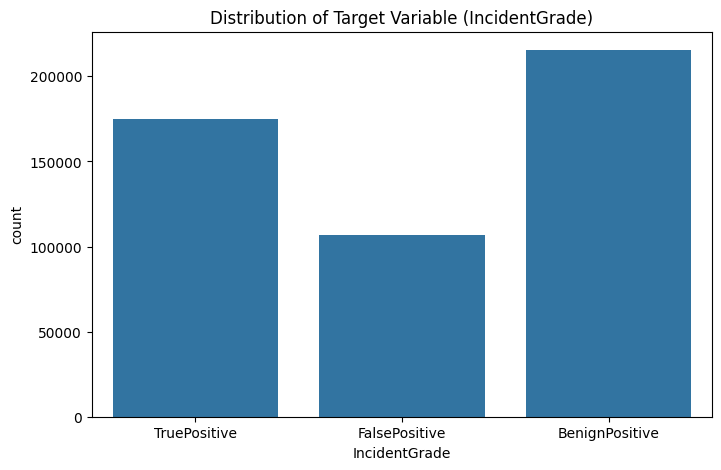

Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...

Combined Descriptive Statistics for Numeric Columns (averaged):
Id                    6.165253e+04
OrgId                 6.034231e+04
IncidentId            1.703026e+05
AlertId               4.969527e+05
DetectorId            6.073837e+04
AlertTitle            6.027770e+04
DeviceId              1.228830e+05
Sha256                1.489539e+05
IpAddress             2.931559e+05
Url                   1.631577e+05
AccountSid            3.450354e+05
AccountUpn            4.180538e+05
AccountObjectId       3.350238e+05
AccountName           3.524456e+05
DeviceName      

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate and display descriptive statistics, correlation, and outliers
def process_chunk(chunk, desc_stats_accum, correlations_accum, outlier_counts, total_outliers, is_first_chunk=False):
    """
    Process each chunk of data: descriptive stats, correlations, outliers, and missing values.
    Args:
    chunk (DataFrame): The current chunk of data.
    desc_stats_accum (DataFrame): Accumulator for descriptive statistics.
    correlations_accum (DataFrame): Accumulator for correlation matrices.
    outlier_counts (dict): Dictionary to track outliers for each column.
    total_outliers (int): Total outlier count.
    is_first_chunk (bool): Flag indicating if this is the first chunk.
    Returns:
    Updated accumulators for descriptive stats, correlations, and outliers.
    """

    # Descriptive statistics for numeric columns
    numeric_columns = chunk.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    desc_stats = numeric_columns.describe()

    # Accumulate descriptive statistics
    desc_stats_accum = pd.concat([desc_stats_accum, desc_stats])

    # Correlation matrix for numeric columns
    correlations = numeric_columns.corr()

    # Accumulate correlations
    correlations_accum = correlations_accum.add(correlations, fill_value=0)

    # Check for missing values (first chunk only)
    if is_first_chunk:
        missing_values = chunk.isnull().sum()
        print("\nMissing values in each column (First Chunk):")
        print(missing_values[missing_values > 0])

        # Distribution of the target variable
        print("\nDistribution of target variable 'IncidentGrade' (First Chunk):")
        print(chunk['IncidentGrade'].value_counts())

        # Visualize the target variable distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(x='IncidentGrade', data=chunk)
        plt.title('Distribution of Target Variable (IncidentGrade)')
        plt.show()

    # Detect outliers using the Interquartile Range (IQR) method
    for col in numeric_columns.columns:
        Q1 = chunk[col].quantile(0.25)
        Q3 = chunk[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = chunk[(chunk[col] < lower_bound) | (chunk[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_counts[col] = outlier_counts.get(col, 0) + outlier_count
        total_outliers += outlier_count

    return desc_stats_accum, correlations_accum, outlier_counts, total_outliers

# File path for the dataset
file_path = Train_Dataset
chunk_size = 500000  # Adjust based on system capacity

# Data type dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Initialize accumulators for descriptive statistics, correlations, and outliers
desc_stats_accum = pd.DataFrame()
correlations_accum = pd.DataFrame()
outlier_counts = {}
total_outliers = 0

# Read data in chunks and process each chunk
try:
    chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
    
    for i, chunk in enumerate(chunks):
        print(f"Processing chunk {i + 1}...")
        desc_stats_accum, correlations_accum, outlier_counts, total_outliers = process_chunk(
            chunk, desc_stats_accum, correlations_accum, outlier_counts, total_outliers, is_first_chunk=(i == 0)
        )
    
    # Average the accumulated correlations
    final_correlation_matrix = correlations_accum / (i + 1)

    # Output combined descriptive statistics
    print("\nCombined Descriptive Statistics for Numeric Columns (averaged):")
    print(desc_stats_accum.mean())

    # Output final correlation matrix
    print("\nFinal Correlation Matrix for Numeric Columns (averaged):")
    print(final_correlation_matrix)

    # Print outlier counts for each numerical column
    print("\nOutlier counts for each numerical column:")
    for col, count in outlier_counts.items():
        print(f"{col}: {count}")

    # Total number of outliers in the dataset
    print(f"\nTotal number of outliers in the dataset: {total_outliers}")

    # Concatenate all chunks for the entire dataset analysis
    chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
    df = pd.concat(chunks, ignore_index=True)

    # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows in the dataset:", duplicate_count)

    # Display the first few rows of the dataset
    print("\nFirst Few Rows of the Dataset:")
    print(df.head())

    # Display the shape of the dataset
    print("\nShape of the dataset:", df.shape)

    # Display the data types of each column
    print("\nData types of each column:")
    print(df.dtypes)

    # Display the column names
    print("\nColumn Names in the Dataset:")
    print(df.columns)

    # Display dataset information
    print("\nDataset Information:")
    print(df.info())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Display target variable distribution
    print("\nTarget variable distribution:")
    print(df['IncidentGrade'].value_counts())

except Exception as e:
    print(f"An error occurred: {e}")


*Testing Dataset*

Processing chunk 1...

Missing values in each column (First Chunk):
MitreTechniques      277888
ActionGrouped        499746
ActionGranular       499746
EmailClusterId       494927
ThreatFamily         496223
ResourceType         499651
Roles                486823
AntispamDirection    490706
SuspicionLevel       421704
LastVerdict          380313
dtype: int64

Distribution of target variable 'IncidentGrade' (First Chunk):
IncidentGrade
BenignPositive    211593
TruePositive      180069
FalsePositive     108338
Name: count, dtype: int64


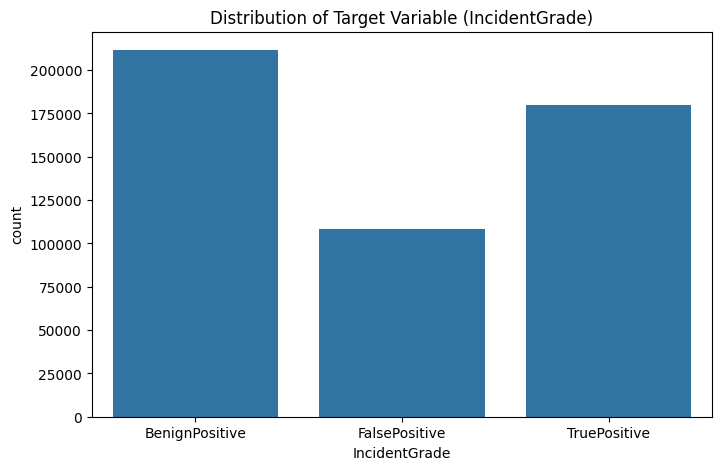

Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...

Combined Descriptive Statistics for Numeric Columns (averaged):
Id                    5.976503e+04
OrgId                 5.846353e+04
IncidentId            1.668710e+05
AlertId               4.952574e+05
DetectorId            5.886656e+04
AlertTitle            5.835896e+04
DeviceId              1.209987e+05
Sha256                1.471164e+05
IpAddress             2.913497e+05
Url                   1.612815e+05
AccountSid            3.432205e+05
AccountUpn            4.179454e+05
AccountObjectId       3.332295e+05
AccountName           3.507700e+05
DeviceName            1.567063e+05
NetworkMessageId      3.999728e+05
EmailClusterId        2.366076e+09
RegistryKey           5.863914e+04
RegistryValueName     5.800996e+04
RegistryValueData     5.815158e+04
ApplicationId         5.905303e+04
ApplicationName       5.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def process_chunk(chunk, desc_stats_accum, correlations_accum, outlier_counts, total_outliers, is_first_chunk=False):
    """
    Process a data chunk for descriptive statistics, correlations, outliers, and missing values.
    
    Args:
    chunk (pd.DataFrame): The chunk of data to process.
    desc_stats_accum (pd.DataFrame): Accumulator for descriptive statistics.
    correlations_accum (pd.DataFrame): Accumulator for correlation matrices.
    outlier_counts (dict): Dictionary to store outlier counts.
    total_outliers (int): Total count of outliers.
    is_first_chunk (bool): Flag for whether it's the first chunk.
    
    Returns:
    Updated accumulators for descriptive stats, correlations, and outliers.
    """

    # Descriptive statistics for numeric columns
    numeric_columns = chunk.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    desc_stats = numeric_columns.describe()

    # Accumulate descriptive statistics
    desc_stats_accum = pd.concat([desc_stats_accum, desc_stats])

    # Correlation matrix for numeric columns
    correlations = numeric_columns.corr()
    correlations_accum = correlations_accum.add(correlations, fill_value=0)

    # Check for missing values and visualize the target variable in the first chunk
    if is_first_chunk:
        missing_values = chunk.isnull().sum()
        if missing_values.any():
            print("\nMissing values in each column (First Chunk):")
            print(missing_values[missing_values > 0])

        # Distribution of the target variable 'IncidentGrade'
        print("\nDistribution of target variable 'IncidentGrade' (First Chunk):")
        print(chunk['IncidentGrade'].value_counts())

        # Plotting the distribution of 'IncidentGrade'
        plt.figure(figsize=(8, 5))
        sns.countplot(x='IncidentGrade', data=chunk)
        plt.title('Distribution of Target Variable (IncidentGrade)')
        plt.show()

    # Detect outliers using the IQR method
    for col in numeric_columns.columns:
        Q1 = chunk[col].quantile(0.25)
        Q3 = chunk[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = chunk[(chunk[col] < lower_bound) | (chunk[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_counts[col] = outlier_counts.get(col, 0) + outlier_count
        total_outliers += outlier_count

    return desc_stats_accum, correlations_accum, outlier_counts, total_outliers

def load_and_process_data(file_path, chunk_size, dtype_dict):
    """
    Load data in chunks and process each chunk for statistics, correlations, and outliers.
    
    Args:
    file_path (str): Path to the dataset.
    chunk_size (int): Size of each chunk to read.
    dtype_dict (dict): Dictionary specifying data types to optimize memory usage.
    """

    # Initialize accumulators for descriptive statistics, correlations, and outliers
    desc_stats_accum = pd.DataFrame()
    correlations_accum = pd.DataFrame()
    outlier_counts = {}
    total_outliers = 0

    try:
        # Read data in chunks
        chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)

        for i, chunk in enumerate(chunks):
            print(f"Processing chunk {i + 1}...")

            # Process each chunk and accumulate results
            desc_stats_accum, correlations_accum, outlier_counts, total_outliers = process_chunk(
                chunk, desc_stats_accum, correlations_accum, outlier_counts, total_outliers, is_first_chunk=(i == 0)
            )

        # Average the accumulated correlations
        final_correlation_matrix = correlations_accum / (i + 1)

        # Output combined descriptive statistics
        print("\nCombined Descriptive Statistics for Numeric Columns (averaged):")
        print(desc_stats_accum.mean())

        # Output final correlation matrix
        print("\nFinal Correlation Matrix for Numeric Columns (averaged):")
        print(final_correlation_matrix)

        # Output outlier counts
        print("\nOutlier counts for each numerical column:")
        for col, count in outlier_counts.items():
            print(f"{col}: {count}")

        print(f"\nTotal number of outliers in the dataset: {total_outliers}")

        # Concatenate all chunks for full dataset analysis
        all_chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
        df = pd.concat(all_chunks, ignore_index=True)

        return df

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_full_dataset(df):
    """
    Analyze the full dataset after all chunks have been concatenated.
    
    Args:
    df (pd.DataFrame): The full dataset.
    """

    if df is None:
        return

    # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows in the dataset:", duplicate_count)

    # Display the first few rows of the dataset
    print("\nFirst Few Rows of the Dataset:")
    print(df.head())

    # Display the shape of the dataset
    print("\nShape of the dataset:", df.shape)

    # Display data types of each column
    print("\nData types of each column:")
    print(df.dtypes)

    # Display dataset info
    print("\nDataset Information:")
    df.info()

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Display target variable distribution
    print("\nTarget variable distribution:")
    print(df['IncidentGrade'].value_counts())

# File path for the dataset
file_path = Test_Dataset
chunk_size = 500000  # Adjust based on system capacity

# Data type dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32', 'Usage': 'object'
}

# Load and process the data
df = load_and_process_data(file_path, chunk_size, dtype_dict)

# Analyze the full dataset
analyze_full_dataset(df)

**Data Preprocessing**

*Training Dataset*

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def load_data(file_path, chunk_size, dtype_dict):
    """
    Load data in chunks and concatenate them into a single DataFrame.
    Args:
        file_path (str): Path to the dataset file.
        chunk_size (int): Size of each chunk to read.
        dtype_dict (dict): Dictionary specifying column data types.
    Returns:
        pd.DataFrame: The concatenated DataFrame containing all chunks.
    """
    try:
        chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
        df = pd.concat(chunks, ignore_index=True)
        print("Data successfully loaded.")
        return df
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None

def drop_high_missing_columns(df, threshold=0.8):
    """
    Drop columns with more than a specified threshold of missing values.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The threshold for dropping columns (default is 0.8).
    Returns:
        pd.DataFrame: DataFrame with high-missing columns dropped.
    """
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Columns dropped due to more than {threshold*100}% missing values: {columns_to_drop.tolist()}")
    return df

def impute_missing_values(df):
    """
    Impute missing values for numeric and categorical columns.
    Args:
        df (pd.DataFrame): The DataFrame to process.
    Returns:
        pd.DataFrame: DataFrame with missing values imputed.
    """
    # Impute numeric columns with median
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
    for col in numeric_columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed column '{col}' with median value: {median_val}")

    # Impute categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputed column '{col}' with mode value: {mode_val}")
    
    return df

def remove_outliers(df, iqr_multiplier=1.5):
    """
    Remove outliers from numeric columns using the IQR method.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        iqr_multiplier (float): The multiplier for IQR to define outliers (default is 1.5).
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    for col in numeric_columns.columns:
        if df[col].nunique() > 10:  # Only consider columns with sufficient unique values
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            before_count = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_count = df.shape[0]
            if before_count != after_count:
                print(f"Column '{col}' reduced from {before_count} to {after_count} rows after outlier removal.")
    return df

def feature_engineering(df):
    """
    Perform feature engineering, including extracting datetime features and scaling numeric features.
    Args:
        df (pd.DataFrame): The DataFrame to process.
    Returns:
        pd.DataFrame: DataFrame with engineered features.
    """
    # Extract datetime features
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
    df['Hour'] = df['Timestamp'].dt.hour
    df.drop(columns=['Timestamp'], inplace=True)
    
    return df

def scale_numeric_features(df, id_columns):
    """
    Scale numeric features using MinMaxScaler, excluding ID columns.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        id_columns (list): List of columns to exclude from scaling.
    Returns:
        pd.DataFrame: DataFrame with scaled numeric features.
    """
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')
    print("\nBefore Scaling:")
    print(numeric_columns.describe())
    
    scaler = MinMaxScaler()
    df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

    print("\nAfter Scaling:")
    print(df[numeric_columns.columns].describe())

    return df

def encode_categorical_variables(df, categorical_columns):
    """
    Encode categorical variables using LabelEncoder.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        categorical_columns (list): List of categorical columns to encode.
    Returns:
        pd.DataFrame: DataFrame with encoded categorical variables.
    """
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary
            print(f"Encoded column '{col}'")
    return df

# File path and chunk size
file_path = Train_Dataset  # Replace with the actual path to your dataset
chunk_size = 500000

# Data types dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Load data
df = load_data(file_path, chunk_size, dtype_dict)

if df is not None:
    # Data preprocessing
    df = drop_high_missing_columns(df)
    df = impute_missing_values(df)
    df = remove_outliers(df, iqr_multiplier=3.0)
    df = feature_engineering(df)

    # Define ID columns to exclude from scaling
    id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 'IpAddress', 'Url',
                  'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
                  'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId',
                  'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'CountryCode', 
                  'State', 'City']

    df = scale_numeric_features(df, id_columns)

    # Encode categorical variables
    categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'SuspicionLevel',
                           'MitreTechniques', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'LastVerdict']
    df = encode_categorical_variables(df, categorical_columns)

    # Remove duplicate rows
    df.drop


Data successfully loaded.
Columns dropped due to more than 80.0% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']


C:\Users\HP\AppData\Local\Temp\ipykernel_11244\1339885887.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


Imputed column 'MitreTechniques' with mode value: T1078;T1078.004
Imputed column 'IncidentGrade' with mode value: BenignPositive
Imputed column 'LastVerdict' with mode value: Suspicious
Column 'OrgId' reduced from 9516837 to 8842950 rows after outlier removal.
Column 'IncidentId' reduced from 8842950 to 8289017 rows after outlier removal.
Column 'DetectorId' reduced from 8289017 to 7447668 rows after outlier removal.
Column 'AlertTitle' reduced from 7447668 to 6109813 rows after outlier removal.
Column 'DeviceId' reduced from 6109813 to 5885669 rows after outlier removal.
Column 'Sha256' reduced from 5885669 to 5506097 rows after outlier removal.
Column 'Url' reduced from 5506097 to 4919468 rows after outlier removal.
Column 'DeviceName' reduced from 4919468 to 4711324 rows after outlier removal.
Column 'NetworkMessageId' reduced from 4711324 to 4105282 rows after outlier removal.
Column 'ApplicationId' reduced from 4105282 to 4027816 rows after outlier removal.
Column 'FileName' reduc

*Testing Dataset*

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Function to load data in chunks and concatenate
def load_data(file_path, chunk_size, dtype_dict):
    """
    Load data in chunks and concatenate them into a single DataFrame.
    Args:
        file_path (str): Path to the dataset file.
        chunk_size (int): Size of each chunk to read.
        dtype_dict (dict): Dictionary specifying column data types.
    Returns:
        pd.DataFrame: The concatenated DataFrame containing all chunks.
    """
    try:
        chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
        df = pd.concat(chunks, ignore_index=True)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None

# Function to drop columns with high missing values
def drop_high_missing_columns(df, threshold=0.8):
    """
    Drop columns with more than a specified threshold of missing values.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The threshold for dropping columns (default is 0.8).
    Returns:
        pd.DataFrame: DataFrame with high-missing columns dropped.
    """
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Columns dropped due to more than {threshold*100}% missing values: {columns_to_drop.tolist()}")
    return df

# Function to impute missing values
def impute_missing_values(df):
    """
    Impute missing values for numeric and categorical columns.
    Args:
        df (pd.DataFrame): The DataFrame to process.
    Returns:
        pd.DataFrame: DataFrame with missing values imputed.
    """
    # Impute numeric columns with median
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
    for col in numeric_columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            print(f"Imputing column '{col}' with median value: {median_val}")
            df[col].fillna(median_val, inplace=True)
    
    # Impute categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            print(f"Imputing column '{col}' with mode value: {mode_val}")
            df[col].fillna(mode_val, inplace=True)
    
    return df

# Function to remove outliers using IQR method
def remove_outliers(df, iqr_multiplier=1.5):
    """
    Remove outliers from numeric columns using the IQR method.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        iqr_multiplier (float): The multiplier for IQR to define outliers (default is 1.5).
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    for col in numeric_features.columns:
        if df[col].nunique() > 10:  # Skip columns with too few unique values
            Q1 = numeric_features[col].quantile(0.25)
            Q3 = numeric_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            before_count = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_count = df.shape[0]
            if before_count != after_count:
                print(f"Column '{col}' reduced from {before_count} to {after_count} rows after outlier removal.")
    return df

# Function to perform feature engineering
def feature_engineering(df):
    """
    Perform feature engineering, including extracting datetime features.
    Args:
        df (pd.DataFrame): The DataFrame to process.
    Returns:
        pd.DataFrame: DataFrame with engineered features.
    """
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
    df['Hour'] = df['Timestamp'].dt.hour
    df.drop(columns=['Timestamp'], inplace=True)  # Drop the original timestamp column
    return df

# Function to scale numeric features using MinMaxScaler
def scale_numeric_features(df, id_columns):
    """
    Scale numeric features using MinMaxScaler, excluding ID columns.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        id_columns (list): List of columns to exclude from scaling.
    Returns:
        pd.DataFrame: DataFrame with scaled numeric features.
    """
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')
    
    print("\nBefore Scaling:")
    print(numeric_features.describe())

    scaler = MinMaxScaler()
    df[numeric_features.columns] = scaler.fit_transform(numeric_features)

    print("\nAfter Scaling:")
    print(df[numeric_features.columns].describe())

    return df

# Function to encode categorical variables
def encode_categorical_variables(df, categorical_columns):
    """
    Encode categorical variables using LabelEncoder.
    Args:
        df (pd.DataFrame): The DataFrame to process.
        categorical_columns (list): List of categorical columns to encode.
    Returns:
        pd.DataFrame: DataFrame with encoded categorical variables.
    """
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary
            print(f"Encoded column '{col}'")
    return df

# Main processing pipeline
file_path = Test_Dataset  # Ensure this is a valid path to your dataset
chunk_size = 500000

# Data types dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32', 'Usage': 'object'
}

# Load data
df = load_data(file_path, chunk_size, dtype_dict)

if df is not None:
    # Drop columns with more than 80% missing values
    df = drop_high_missing_columns(df)

    # Impute missing values
    df = impute_missing_values(df)

    # Remove outliers
    df = remove_outliers(df, iqr_multiplier=3.0)

    # Perform feature engineering
    df = feature_engineering(df)

    # Define ID columns to exclude from scaling
    id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
                  'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
                  'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 
                  'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
                  'FileName', 'FolderPath', 'ResourceIdName', 'CountryCode', 'State', 'City']

    # Scale numeric features
    df = scale_numeric_features(df, id_columns)

    # Encode categorical variables
    categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'SuspicionLevel', 
                           'MitreTechniques', 'ThreatFamily', 'ResourceType', 'Roles', 
                           'AntispamDirection', 'LastVerdict']
    df = encode_categorical_variables(df, categorical_columns)

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # Save processed data to CSV
    df.to_csv('Testing_data.csv', index=False)
    print("Data preprocessing complete and saved to 'Testing_data.csv'.")


Data loaded successfully.
Columns dropped due to more than 80.0% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']
Imputing column 'MitreTechniques' with mode value: T1078;T1078.004


C:\Users\HP\AppData\Local\Temp\ipykernel_11244\2074072012.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


Imputing column 'LastVerdict' with mode value: Suspicious
Column 'OrgId' reduced from 4147992 to 3880026 rows after outlier removal.
Column 'IncidentId' reduced from 3880026 to 3626027 rows after outlier removal.
Column 'DetectorId' reduced from 3626027 to 3239340 rows after outlier removal.
Column 'AlertTitle' reduced from 3239340 to 2787345 rows after outlier removal.
Column 'DeviceId' reduced from 2787345 to 2690484 rows after outlier removal.
Column 'Sha256' reduced from 2690484 to 2507111 rows after outlier removal.
Column 'IpAddress' reduced from 2507111 to 1851199 rows after outlier removal.
Column 'Url' reduced from 1851199 to 1602488 rows after outlier removal.
Column 'AccountSid' reduced from 1602488 to 921596 rows after outlier removal.
Column 'AccountObjectId' reduced from 921596 to 917114 rows after outlier removal.
Column 'AccountName' reduced from 917114 to 902637 rows after outlier removal.
Column 'DeviceName' reduced from 902637 to 761789 rows after outlier removal.
Co

**Data Splitting**

*Overview*

In [27]:
import pandas as pd

# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(Train_Dataset, chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("Column Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Target variable distribution for the entire dataset
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())

First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersio

*Data splitting with Stratified sampling*

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Microsoft_ML\Testing_data.csv')

# Specify your target variable
target_variable = 'IncidentGrade'  # Change this to your target variable column name

# Define the stratified sampling size (10% of the dataset)
sampling_size = 0.10

# Optionally, sample 10% of the dataset if needed
if sampling_size > 0:
    df = df.sample(frac=sampling_size, random_state=42)

# Perform the train-validation split with stratification
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target

# Split the dataset into training and validation sets with 80-20 split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.20,  # 80% train, 20% validation
    stratify=y,      # Stratify based on the target variable
    random_state=42  # For reproducibility
)

# Optional: Convert to DataFrames if needed
train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)

# Define the directory to save the files
save_dir = r'C:\Guvi\projects\Microsoft_Cybersecurity_'

# Check if the directory exists; if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the splits to CSV files
train_df.to_csv(os.path.join(save_dir, 'Train_split.csv'), index=False)
valid_df.to_csv(os.path.join(save_dir, 'Valid_split.csv'), index=False)

print("Train and validation splits created successfully.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")

Train and validation splits created successfully.
Training set shape: (31411, 40)
Validation set shape: (7853, 40)


**Model Selection And Training**

# *Baseline Model*

*Logical Regression*

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
import psutil
import os

# Load stratified sampled data
train_file_path = r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv'
valid_file_path = r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv'

# Read the datasets
df_train = pd.read_csv(train_file_path)
df_valid = pd.read_csv(valid_file_path)

# One-hot encode categorical variables (both training and validation datasets)
df_train = pd.get_dummies(df_train)
df_valid = pd.get_dummies(df_valid)

# Align columns of validation set with the training set to ensure matching feature space
df_valid = df_valid.reindex(columns=df_train.columns, fill_value=0)

# Prepare features and target variable
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_valid = df_valid.drop(columns=['IncidentGrade'])
y_valid = df_valid['IncidentGrade']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Initialize logistic regression
logreg = LogisticRegression(solver='liblinear')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' is required for l1 penalty
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Train model with time tracking
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Get the best model
best_logreg = grid_search.best_estimator_

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the best model on validation data
y_pred = best_logreg.predict(X_valid_scaled)

# Print results
print("Best Parameters:")
print(grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       728
           1       0.73      0.57      0.64       829
           2       0.94      0.95      0.94      6296

    accuracy                           0.89      7853
   macro avg       0.76      0.74      0.74      7853
weighted avg       0.89      0.89      0.89      7853

Confusion Matrix:
[[ 512   81  135]
 [ 114  473  242]
 [ 223   96 5977]]
Training Time: 33.58 seconds
Memory Usage: 211.48 MB


*Decision Tree Model*

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import time
import psutil
import os

# Function to load CSV with error handling
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file at {file_path} is empty.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

# Load stratified sampled data
train_file_path = r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv'
valid_file_path = r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv'

df_train = load_data(train_file_path)
df_valid = load_data(valid_file_path)

if df_train is not None and df_valid is not None:
    # Prepare features and target variable
    X_train = df_train.drop(columns=['IncidentGrade'])
    y_train = df_train['IncidentGrade']
    X_valid = df_valid.drop(columns=['IncidentGrade'])
    y_valid = df_valid['IncidentGrade']

    # One-hot encode categorical variables (if any)
    X_train = pd.get_dummies(X_train)
    X_valid = pd.get_dummies(X_valid)

    # Align the columns of the validation set to match the training set
    X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    # Initialize decision tree classifier
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'max_depth': randint(1, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['auto', 'sqrt', 'log2']
    }

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dist, 
                                        n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)

    # Train model with time tracking
    start_time = time.time()
    random_search.fit(X_train_scaled, y_train)
    end_time = time.time()

    # Get the best model
    best_decision_tree = random_search.best_estimator_

    # Get memory usage
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

    # Evaluate the best model on validation data
    y_pred = best_decision_tree.predict(X_valid_scaled)

    # Print results
    print("Best Parameters:")
    print(random_search.best_params_)
    print("\nClassification Report:")
    print(classification_report(y_valid, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_valid, y_pred))
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print(f"Memory Usage: {memory_usage:.2f} MB")
else:
    print("Data loading failed, cannot proceed with training.")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666

Best Parameters:
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6}

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       728
           1       0.90      0.83      0.86       829
           2       0.98      0.96      0.97      6296

    accuracy                           0.94      7853
   macro avg       0.85      0.87      0.86      7853
weighted avg       0.94      0.94      0.94      7853

Confusion Matrix:
[[ 601   47   80]
 [  95  684   50]
 [ 198   28 6070]]
Training Time: 6.47 seconds
Memory Usage: 271.70 MB


**Advanced Models**

*Random Forest Model*

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from joblib import parallel_backend
import time
import psutil
import os

# Load prepared data
def load_data(train_path, valid_path):
    """
    Load and split data into features (X) and labels (y) from CSV files.

    Parameters:
    train_path (str): Path to the training dataset.
    valid_path (str): Path to the validation dataset.

    Returns:
    X_train, y_train, X_val, y_val: Features and labels for training and validation sets.
    """
    X_train = pd.read_csv(train_path)
    y_train = X_train.pop('IncidentGrade')
    
    X_val = pd.read_csv(valid_path)
    y_val = X_val.pop('IncidentGrade')
    
    return X_train, y_train, X_val, y_val

# Create a preprocessing pipeline for categorical and numerical features
def create_preprocessing_pipeline(X_train):
    """
    Create a preprocessing pipeline to handle categorical and numerical data.

    Parameters:
    X_train: Training feature set.

    Returns:
    preprocessing_pipeline: Pipeline for data transformation.
    """
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Define preprocessing for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical data
        ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encoding
    ])

    # Define preprocessing for numerical features
    numerical_transformer = SimpleImputer(strategy='mean')  # Handle missing numerical data

    # Combine transformers into a preprocessing pipeline
    preprocessing_pipeline = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    return preprocessing_pipeline

# Load data
X_train, y_train, X_val, y_val = load_data(
    train_path=r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv',
    valid_path=r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv'
)

# Create preprocessing pipeline
preprocessing_pipeline = create_preprocessing_pipeline(X_train)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Setup randomized search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=cv,
    scoring='f1_macro',  # Use F1 score for evaluation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Create a pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('random_search', random_search)
])

# Train model with randomized search and time tracking
start_time = time.time()

# Use joblib for parallel processing
with parallel_backend('loky'):
    pipeline.fit(X_train, y_train)

end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Get the best model from RandomizedSearchCV
best_rf = pipeline.named_steps['random_search'].best_estimator_

# Evaluate the model on the validation data using the same preprocessing pipeline
X_val_preprocessed = preprocessing_pipeline.transform(X_val)
y_pred = best_rf.predict(X_val_preprocessed)

# Print results
print(f"Best Hyperparameters: {pipeline.named_steps['random_search'].best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       728
           1       0.94      0.93      0.94       829
           2       0.99      0.99      0.99      6296

    accuracy                           0.98      7853
   macro avg       0.95      0.95      0.95      7853
weighted avg       0.98      0.98      0.98      7853

Confusion Matrix:
[[ 686   24   18]
 [  32  772   25]
 [  43   24 6229]]
Training Time: 947.58 seconds
Memory Usage: 149.57 MB


*Gradient Boosting Machines - XGBoost*

In [3]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 365.7 kB/s eta 0:05:42
   ---------------------------------------- 0.1/124.9 MB 357.2 kB/s eta 0:05:50
   ---------------------------------------- 0.1/124.9 MB 357.2 kB/s eta 0:05:50
   ---------------------------------------- 0.1/124.9 MB 364.4 kB/s eta 0:05:43
   ---------------------------------------- 0.1/124.9 MB 361.0 kB/s eta 0:05:46
   ---------------------------------------- 0.1/124.9 MB 388.1 kB/s eta 0:05:22
   ---------------------------------------- 0.1/124.9 MB 388.1 kB/s eta 0:05:22
   ---------------------------------------- 0.2/124.9 MB 353.1 kB/s eta 0:05:54
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ----- --------------------------------- 17.3/124.9 MB 330.9 kB/s eta 0:05:26
   ----- --------------------------------- 17.3/124.9 MB 330.9 kB/s eta 0:05:26
   ----- --------------------------------- 17.3/124.9 MB 330.8 kB/s eta 0:05:26
   ----- --------------------------------- 17.3/124.9 MB 330.8 kB/s eta 0:05:26
   ----- --------------------------------- 17.3/124.9 MB 330.8 kB/s eta 0:05:26
   ----- --------------------------------- 17.4/124.9 MB 330.9 kB/s eta 0:05:25
   ----- --------------------------------- 17.4/124.9 MB 330.9 kB/s eta 0:05:25
   ----- --------------------------------- 17.4/124.9 MB 330.9 kB/s eta 0:05:25
   ----- --------------------------------- 17.4/124.9 MB 330.9 kB/s eta 0:05:25
   ----- --------------------------------- 17.4/124.9 MB 329.2 kB/s eta 0:05:27
   ----- --------------------------------- 17.4/124.9 MB 329.0 kB/s eta 0:05:27
   ----- --------------------------------- 17.4/124.9 MB 328.7 kB/s eta 0:05:27
   ----- -------------------------------

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from joblib import parallel_backend
import time
import psutil
import os
from functools import partial

# Load prepared data
X_train = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv')
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv')
y_val = X_val.pop('IncidentGrade')

# Ensure that all columns are numeric or encoded properly
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Align columns of validation and training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)

# Define optimized parameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 9],           # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],     # Fraction of samples used for fitting each base learner
    'colsample_bytree': [0.7, 0.8, 1.0] # Fraction of features used for each tree
}

# Create a custom fit method with early stopping
fit_with_early_stopping = partial(
    xgb_model.fit,
    early_stopping_rounds=10,
    eval_set=[(X_val, y_val)],
    verbose=0
)

xgb_model.fit = fit_with_early_stopping

# Setup randomized search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of parameter settings to sample
    cv=cv, 
    scoring='f1_macro',  # Use F1 score for evaluation
    n_jobs=-1, 
    random_state=42
)

# Train model with randomized search and time tracking
start_time = time.time()

# Use joblib for parallel processing
with parallel_backend('loky'):
    random_search.fit(X_train, y_train)

end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Get the best model
best_xgb = random_search.best_estimator_

# Evaluate the model on validation data
y_pred = best_xgb.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       728
           1       0.93      0.93      0.93       829
           2       0.99      0.99      0.99      6296

    accuracy                           0.98      7853
   macro avg       0.94      0.95      0.95      7853
weighted avg       0.98      0.98      0.98      7853

Confusion Matrix:
[[ 683   26   19]
 [  27  774   28]
 [  48   30 6218]]
Training Time: 100.47 seconds
Memory Usage: 180.41 MB


*Gradient Boosting Machines - LightGBM*

In [10]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from joblib import parallel_backend
import time
import psutil
import os

# Load prepared data
X_train = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv')
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv')
y_val = X_val.pop('IncidentGrade')

# Check and convert non-numeric columns to numeric
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Ensure the same columns in both train and validation datasets
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Handle missing values
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

# Initialize LightGBM classifier
lgbm = LGBMClassifier()

# Define parameter grid for random search
param_dist = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage
    'num_leaves': [31, 50, 70],                # Maximum number of leaves in one tree
    'max_depth': [-1, 10, 20],                 # Maximum depth of a tree (-1 means no limit)
    'subsample': [0.7, 0.8, 1.0],             # Fraction of samples used for fitting each base learner
    'colsample_bytree': [0.7, 0.8, 1.0]       # Fraction of features used for each tree
}

# Setup random search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=cv,
    scoring='f1_macro',  # Use F1 score for evaluation
    n_jobs=-1,
    random_state=42
)

# Train model with random search and time tracking
start_time = time.time()
with parallel_backend('loky'):
    random_search.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Get the best model
best_lgbm = random_search.best_estimator_

# Evaluate the model on validation data
y_pred = best_lgbm.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1410
[LightGBM] [Info] Number of data points in the train set: 31411, number of used features: 18
[LightGBM] [Info] Start training from score -2.379005
[LightGBM] [Info] Start training from score -2.247796
[LightGBM] [Info] Start training from score -0.220989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

*Neural Network*

In [21]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.66.1-cp312-cp312-win_amd64.whl.metadata (4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install distlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time
import psutil
import os
import numpy as np

# Load prepared data
X_train = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv')
y_train = X_train.pop('IncidentGrade')  # Remove 'IncidentGrade' from X_train and assign it to y_train
X_val = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv')
y_val = X_val.pop('IncidentGrade')  # Remove 'IncidentGrade' from X_val and assign it to y_val

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to both train and validation data
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# Ensure both train and validation data have the same columns
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# One-hot encoding for target variable
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

# Ensure the target variables have the same columns
y_train, y_val = y_train.align(y_val, join='left', axis=1, fill_value=0)

# Convert to numpy arrays and ensure float32 type for TensorFlow
X_train = np.array(X_train).astype('float32')
X_val = np.array(X_val).astype('float32')
y_train = np.array(y_train).astype('float32')
y_val = np.array(y_val).astype('float32')

# Initialize a neural network for multiclass classification
def create_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multiclass classification

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
num_classes = y_train.shape[1]
model = create_model(X_train.shape[1], num_classes)

# Set up early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

# Train the model with early stopping and time tracking
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Start with fewer epochs
    batch_size=32,  # Smaller batch size for quicker updates
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=-1)
y_val_classes = y_val.argmax(axis=-1)

# Print results
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_val_classes, y_pred_classes))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


982/982 - 7s - 7ms/step - accuracy: 0.8074 - loss: 0.5522 - val_accuracy: 0.5468 - val_loss: 0.8412 - learning_rate: 0.0010
Epoch 2/50
982/982 - 3s - 3ms/step - accuracy: 0.8595 - loss: 0.3778 - val_accuracy: 0.1532 - val_loss: 1.3394 - learning_rate: 0.0010
Epoch 3/50
982/982 - 3s - 3ms/step - accuracy: 0.8652 - loss: 0.3492 - val_accuracy: 0.8114 - val_loss: 3.0134 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
982/982 - 3s - 3ms/step - accuracy: 0.8671 - loss: 0.3347 - val_accuracy: 0.2300 - val_loss: 1.4557 - learning_rate: 0.0010
Epoch 5/50
982/982 - 3s - 3ms/step - accuracy: 0.8698 - loss: 0.3144 - val_accuracy: 0.8786 - val_loss: 0.3601 - learning_rate: 5.0000e-04
Epoch 6/50
982/982 - 3s - 3ms/step - accuracy: 0.8716 - loss: 0.3104 - val_accuracy: 0.8723 - val_loss: 0.3086 - learning_rate: 5.0000e-04
Epoch 7/50
982/982 - 3s - 3ms/step - accuracy: 0.8737 - loss: 0.3026 - val_accuracy: 0.1253 - val_loss: 2.9974 - lea

**Model Evaluation and Tuning**

*Comparison on Advanced Models*

Comparison Table:
         Model  Accuracy  Macro-F1 Score  Precision (Macro)  Recall (Macro)  Training Time (s)  Memory Usage (MB)
 Random Forest      0.98            0.96               0.95            0.96            1544.96             113.25
       XGBoost      0.98            0.95               0.95            0.95             220.16             393.50
      LightGBM      0.98            0.96               0.96            0.95             142.40             388.11
Neural Network      0.88            0.77               0.76            0.79              69.31             453.97

Best Model Based on Macro-F1 Score:
Model                Random Forest
Accuracy                      0.98
Macro-F1 Score                0.96
Precision (Macro)             0.95
Recall (Macro)                0.96
Training Time (s)          1544.96
Memory Usage (MB)           113.25
Name: 0, dtype: object


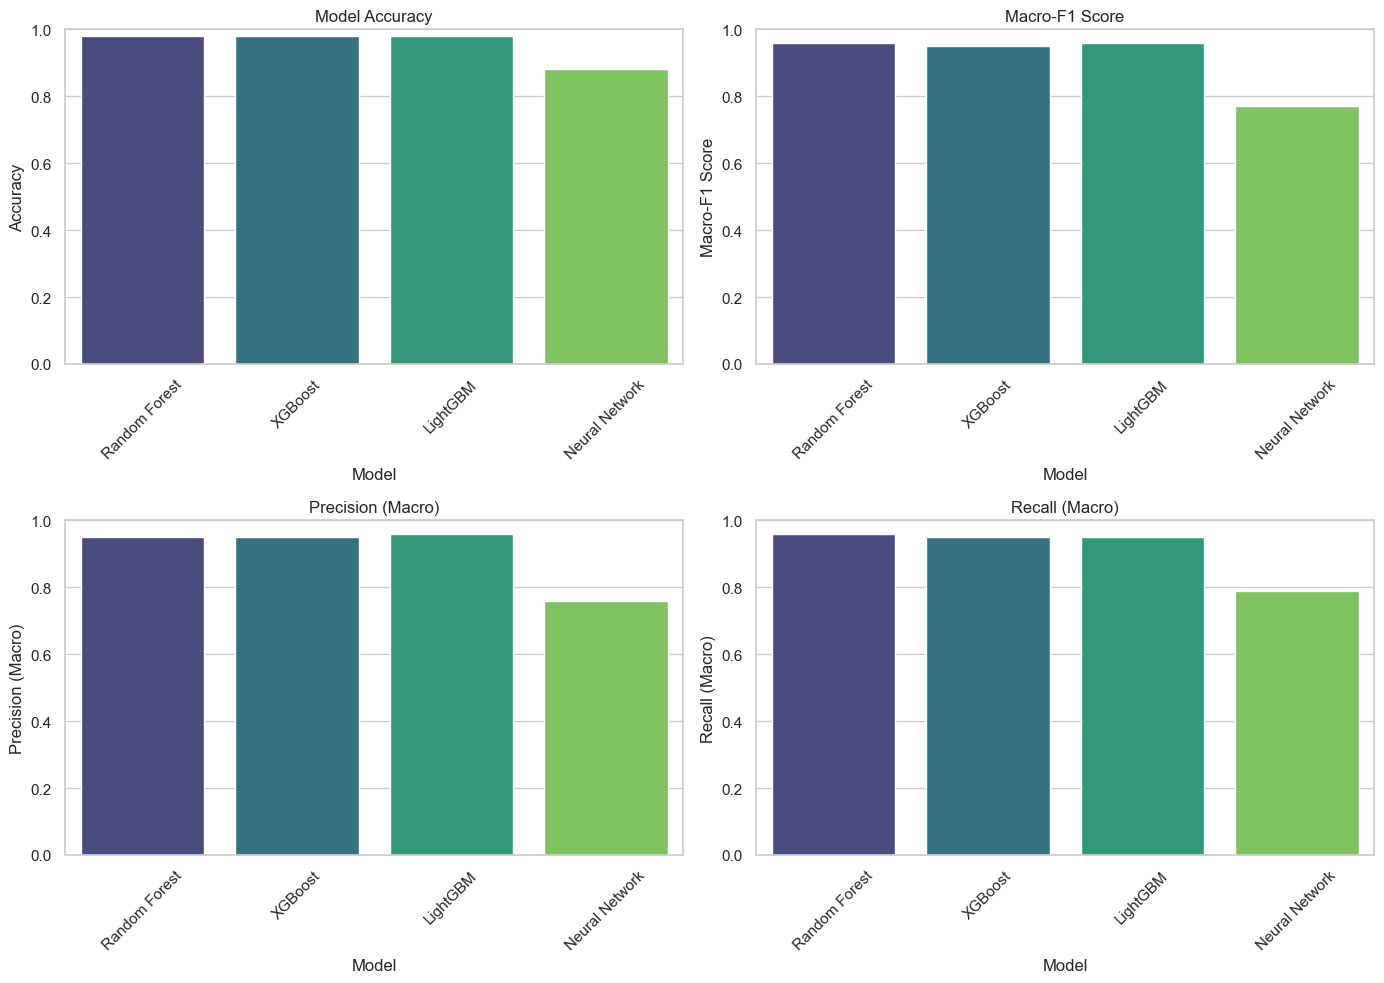

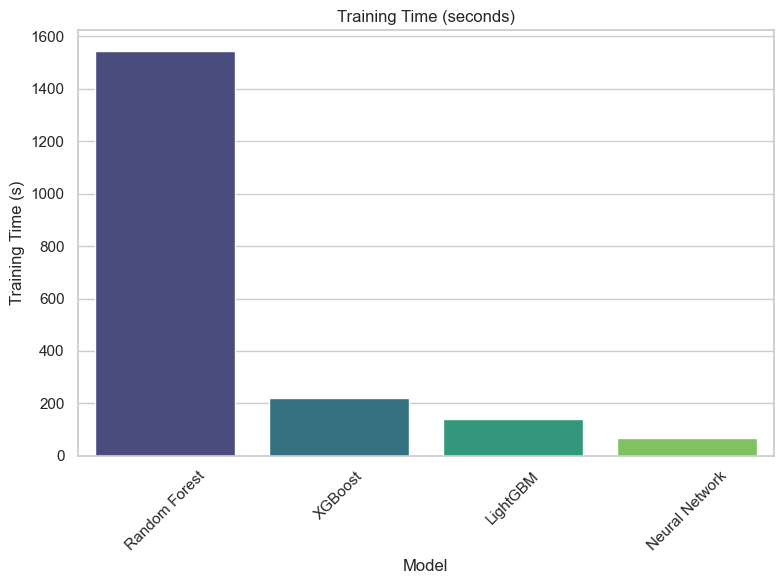

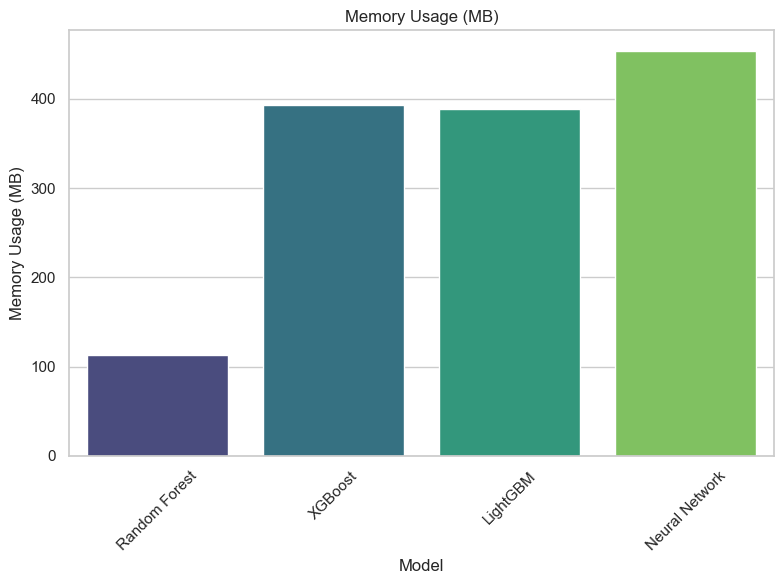

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for comparison based on your provided outputs
data = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Neural Network'],
    'Accuracy': [0.98, 0.98, 0.98, 0.88],
    'Macro-F1 Score': [0.96, 0.95, 0.96, 0.77],
    'Precision (Macro)': [0.95, 0.95, 0.96, 0.76],
    'Recall (Macro)': [0.96, 0.95, 0.95, 0.79],
    'Training Time (s)': [1544.96, 220.16, 142.40, 69.31],
    'Memory Usage (MB)': [113.25, 393.50, 388.11, 453.97]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Macro-F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Precision (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Recall (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()

# Plot for Training Time
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Training Time (s)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Training Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Memory Usage
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Memory Usage (MB)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Memory Usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Selected Advanced Model: Random Forest with Hyperparameter Tuning and Class Imbalance Handling*

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from joblib import parallel_backend, dump
import time
import psutil
import os
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Load prepared data
X_train = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv')
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv')
y_val = X_val.pop('IncidentGrade')

# One-hot encoding for categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Align columns between train and validation sets
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Initialize SMOTE and apply it once to avoid repeated execution during hyperparameter tuning
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
X_resampled = pca.fit_transform(X_resampled)
X_val = pca.transform(X_val)

# Initialize Random Forest classifier with early stopping
rf = RandomForestClassifier(random_state=42, warm_start=True)

# Define a reduced parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Reduce number of trees
    'max_depth': [10, 20],  # Focus on smaller depths
    'max_features': ['sqrt'],  # Remove unnecessary options
    'min_samples_split': [2, 5],  # Limit options
    'min_samples_leaf': [1, 2],  # Remove larger leaf sizes
    'bootstrap': [True]  # Stick to bootstrap
}

# Setup randomized search with fewer iterations and cross-validation folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduce CV folds to 3
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,  # Reduce number of parameter settings to sample
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Train model with randomized search and time tracking
start_time = time.time()
with parallel_backend('loky'):
    random_search.fit(X_resampled, y_resampled)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Get the best model
best_rf = random_search.best_estimator_

# Evaluate the model on the validation data
y_pred = best_rf.predict(X_val)

# Print results
print(f"Best Hyperparameters: {random_search.best_params_}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

# Save the best model as a .pkl file
dump(best_rf, r'C:\Guvi\projects\Microsoft_Cybersecurity_\best_random_forest_model.pkl')
print("Model saved as best_random_forest_model.pkl")

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.79      0.67       728
           1       0.70      0.77      0.73       829
           2       0.99      0.94      0.96      6296

    accuracy                           0.91      7853
   macro avg       0.76      0.83      0.79      7853
weighted avg       0.92      0.91      0.91      7853

Confusion Matrix:
[[ 572  133   23]
 [ 154  640   35]
 [ 251  141 5904]]
Training Time: 160.11 seconds
Memory Usage: 525.27 MB
Model saved as best_random_forest_model.pkl


**Model Interpretation**

*Feature Importance and Error Analysis*

Model was trained on 2 features, but X_val has 40 features.
Calculating Random Forest Built-in Feature Importance...
Top 10 Important Features:
  Feature  Importance
0      Id    0.554291
1   OrgId    0.445709


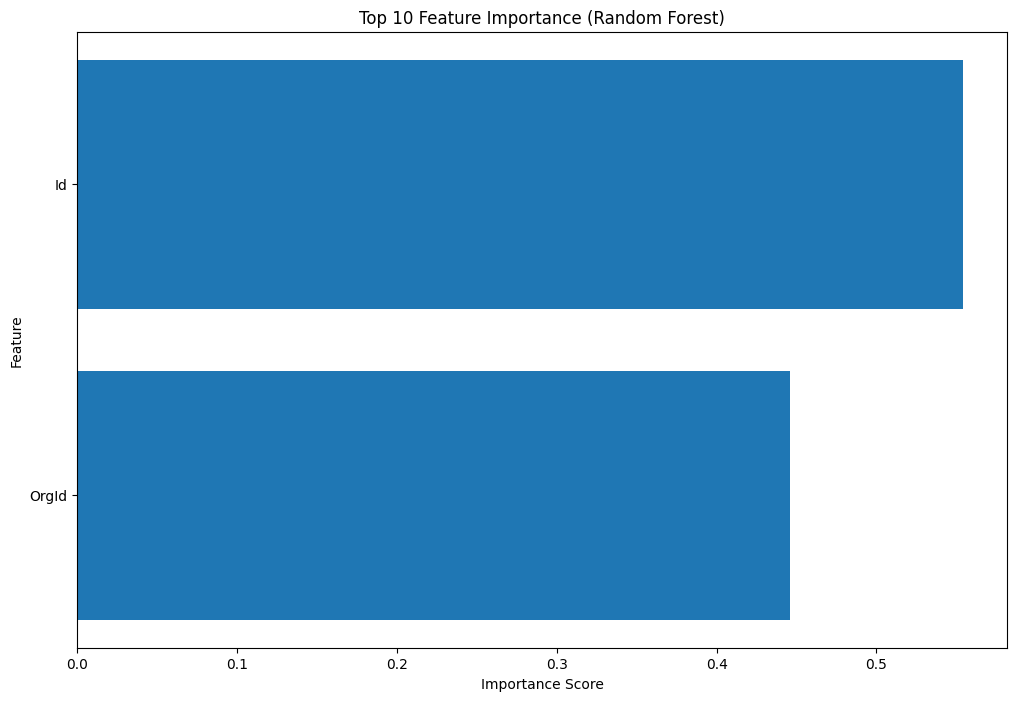

Number of misclassifications: 7125
Sample misclassified cases:
     Id  OrgId
0  1804      0
1   672     22
3  3046     50
4   457     54
5  1742      0
Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.17       728
           1       0.00      0.00      0.00       829
           2       0.00      0.00      0.00      6296

    accuracy                           0.09      7853
   macro avg       0.03      0.33      0.06      7853
weighted avg       0.01      0.09      0.02      7853

Confusion Matrix:
[[ 728    0    0]
 [ 829    0    0]
 [6296    0    0]]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import load

# Load prepared data
X_train = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Train_split.csv')
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r'C:\Guvi\projects\Microsoft_Cybersecurity_\Valid_split.csv')
y_val = X_val.pop('IncidentGrade')

# One-hot encoding for categorical variables (if applicable)
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Ensure train and validation datasets have the same columns
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# Load the trained Random Forest model
best_rf = load(r'C:\Guvi\projects\Microsoft_Cybersecurity_\best_random_forest_model.pkl')

# Verify that the number of features matches between the model and validation set
if len(best_rf.feature_importances_) != X_val.shape[1]:
    print(f"Model was trained on {len(best_rf.feature_importances_)} features, but X_val has {X_val.shape[1]} features.")
    # Adjust the number of columns by selecting only the features present in the model
    X_val = X_val.iloc[:, :len(best_rf.feature_importances_)]

# Calculate feature importance
print("Calculating Random Forest Built-in Feature Importance...")
feature_importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_val.columns[:len(feature_importances)], 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Make predictions
y_pred = best_rf.predict(X_val)

# Error Analysis
misclassified_indices = np.where(y_pred != y_val)[0]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassifications: {num_misclassified}")

# Display sample of misclassified cases
print("Sample misclassified cases:")
print(X_val.iloc[misclassified_indices].head())

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

**Final Evaluation on Test Set**

*Selected model Evaluation with Test dataset*

In [9]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from joblib import load
import time
import psutil
import os

# Load the saved model
best_model_path = r'C:\Guvi\projects\Microsoft_Cybersecurity_\best_random_forest_model.pkl'
loaded_model = load(best_model_path)

# Load the test dataset
test_file_path = r'C:\Users\HP\OneDrive\Desktop\Microsoft_ML\Testing_data.csv'
df_test = pd.read_csv(test_file_path)

# Prepare test data
X_test = df_test.drop(columns=['IncidentGrade'])
y_test = df_test['IncidentGrade']

# One-hot encoding for categorical variables (if applicable)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that the test data has the same features as the model's training data
# In case there are missing or extra columns in X_test
model_features = loaded_model.feature_importances_.shape[0]  # Number of features used in the model
X_test = X_test.reindex(columns=X_test.columns[:model_features], fill_value=0)

# Start time for evaluating the model
start_time = time.time()

# Make predictions using the loaded model
y_test_pred = loaded_model.predict(X_test)

# End time for evaluating the model
end_time = time.time()

# Calculate memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Calculate and print the evaluation metrics
print("Test Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

# Print evaluation time and memory usage
print(f"Evaluation Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Set Results:
Macro-F1 Score: 0.0569
Macro Precision: 0.0311


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Macro Recall: 0.3333

Classification Report (Test Set):


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.09      1.00      0.17     36643
           1       0.00      0.00      0.00     42156
           2       0.00      0.00      0.00    313840

    accuracy                           0.09    392639
   macro avg       0.03      0.33      0.06    392639
weighted avg       0.01      0.09      0.02    392639

Confusion Matrix (Test Set):
[[ 36643      0      0]
 [ 42156      0      0]
 [313840      0      0]]
Evaluation Time: 5.06 seconds
Memory Usage: 1521.12 MB


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


*Baseline model - Logestic regression on Test Data*

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import time
import psutil
import os

# Load the test dataset
test_file_path = r'C:\Users\HP\OneDrive\Desktop\Microsoft_ML\Testing_data.csv'
df_test = pd.read_csv(test_file_path)

# Prepare features and target variable
X_test = df_test.drop(columns=['IncidentGrade'])
y_test = df_test['IncidentGrade']

# Apply one-hot encoding to categorical features
X_test = pd.get_dummies(X_test, drop_first=True)

# Initialize logistic regression with default parameters
logreg = LogisticRegression(max_iter=100, solver='liblinear')

# Train-validation split with stratification
# Split the data again for training and validation since it's mentioned as 'Test Dataset'
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)

# Train model with time tracking
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the model on validation data
y_val_pred = logreg.predict(X_val)

# Print validation results
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

# Calculate and print the evaluation metrics for the validation set
print("\nValidation Set Results:")
print(f"Macro-F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_val, y_val_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_val, y_val_pred, average='macro'):.4f}")

# Evaluate the model on the entire test data
y_test_pred = logreg.predict(X_test)

# Calculate and print the evaluation metrics for the test set
print("\nTest Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.33      0.40      7329
           1       0.72      0.58      0.64      8431
           2       0.90      0.96      0.93     62768

    accuracy                           0.86     78528
   macro avg       0.72      0.62      0.66     78528
weighted avg       0.85      0.86      0.85     78528

Validation Confusion Matrix:
[[ 2395  1080  3854]
 [  625  4885  2921]
 [ 1500   833 60435]]
Training Time: 23.81 seconds
Memory Usage: 1548.40 MB

Validation Set Results:
Macro-F1 Score: 0.6586
Macro Precision: 0.7159
Macro Recall: 0.6230

Test Set Results:
Macro-F1 Score: 0.6558
Macro Precision: 0.7133
Macro Recall: 0.6202

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.33      0.40     36643
           1       0.71      0.57      0.63     42156
           2       0.90      0.96      0.93    313840

    acc

*Baseline model - Decision Tree on Test Data*

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
import psutil
import os
import numpy as np

# Load the test dataset
test_file_path = r'C:\Users\HP\OneDrive\Desktop\Microsoft_ML\Testing_data.csv'
df_test = pd.read_csv(test_file_path)

# Sample a smaller subset for faster testing (optional, remove if you want to use the full dataset)
df_test_sampled = df_test.sample(frac=0.5, random_state=42)

# Prepare features and target variable
X_test = df_test_sampled.drop(columns=['IncidentGrade'])
y_test = df_test_sampled['IncidentGrade']

# Split the data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define a column transformer that applies OneHotEncoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as is (numeric ones)
)

# Initialize decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define a reduced parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],  # Limit max depth to reduce complexity
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'ccp_alpha': np.linspace(0, 0.02, 5)  # Reduced number of values
}

# Create a pipeline that first applies the preprocessor and then trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', decision_tree)])

# Use RandomizedSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 5],
        'model__ccp_alpha': np.linspace(0, 0.02, 5)
    },
    n_iter=50,  # Limit the number of parameter combinations to test
    scoring='accuracy',
    cv=3,  # Reduced cross-validation to 3 folds for faster results
    n_jobs=-1,  # Utilize all CPU cores
    verbose=1,
    random_state=42
)

# Train model with time tracking
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best model
best_pipeline = random_search.best_estimator_

# Get memory usage
process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert to MB

# Evaluate the best model on validation data
y_val_pred = best_pipeline.predict(X_val)

# Print validation results
print("Best Parameters:")
print(random_search.best_params_)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print(f"Training Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")

# Evaluate the best model on the entire test data
y_test_pred = best_pipeline.predict(X_test)

# Calculate and print the evaluation metrics for the test set
print("\nTest Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters:
{'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 15, 'model__criterion': 'gini', 'model__ccp_alpha': 0.0}

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3674
           1       0.94      0.92      0.93      4209
           2       0.99      0.99      0.99     31381

    accuracy                           0.97     39264
   macro avg       0.93      0.94      0.94     39264
weighted avg       0.97      0.97      0.97     39264

Validation Confusion Matrix:
[[ 3348   144   182]
 [  198  3852   159]
 [  266   114 31001]]
Training Time: 59.29 seconds
Memory Usage: 477.14 MB

Test Set Results:
Macro-F1 Score: 0.9497
Macro Precision: 0.9473
Macro Recall: 0.9525

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91  

*Comparison of Base line Models with Advanced model*

Comparison of Model Performance:
                 Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0        Random Forest      0.94               0.8353            0.8975   
1  Logistic Regression      0.86               0.7201            0.6242   
2        Decision Tree      1.00               0.9952            0.9955   

   Macro Avg F1-Score  Weighted Avg Precision  Weighted Avg Recall  \
0              0.8631                    0.94                 0.94   
1              0.6619                    0.85                 0.86   
2              0.9954                    1.00                 1.00   

   Weighted Avg F1-Score  Training Time (s)  Memory Usage (MB)  \
0                   0.94               4.58             716.82   
1                   0.85              45.06             414.65   
2                   1.00            4561.10             129.75   

   Time per Accuracy (s)  Memory per Accuracy (MB)  
0               4.872340                762.574468  
1             

C:\Users\HP\AppData\Local\Temp\ipykernel_7924\938753014.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_7924\938753014.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Macro Avg F1-Score', data=df, ax=axes[0, 1], palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_7924\938753014.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Weighted Avg Precision', data=df, ax=axes[1, 0], palette="vi

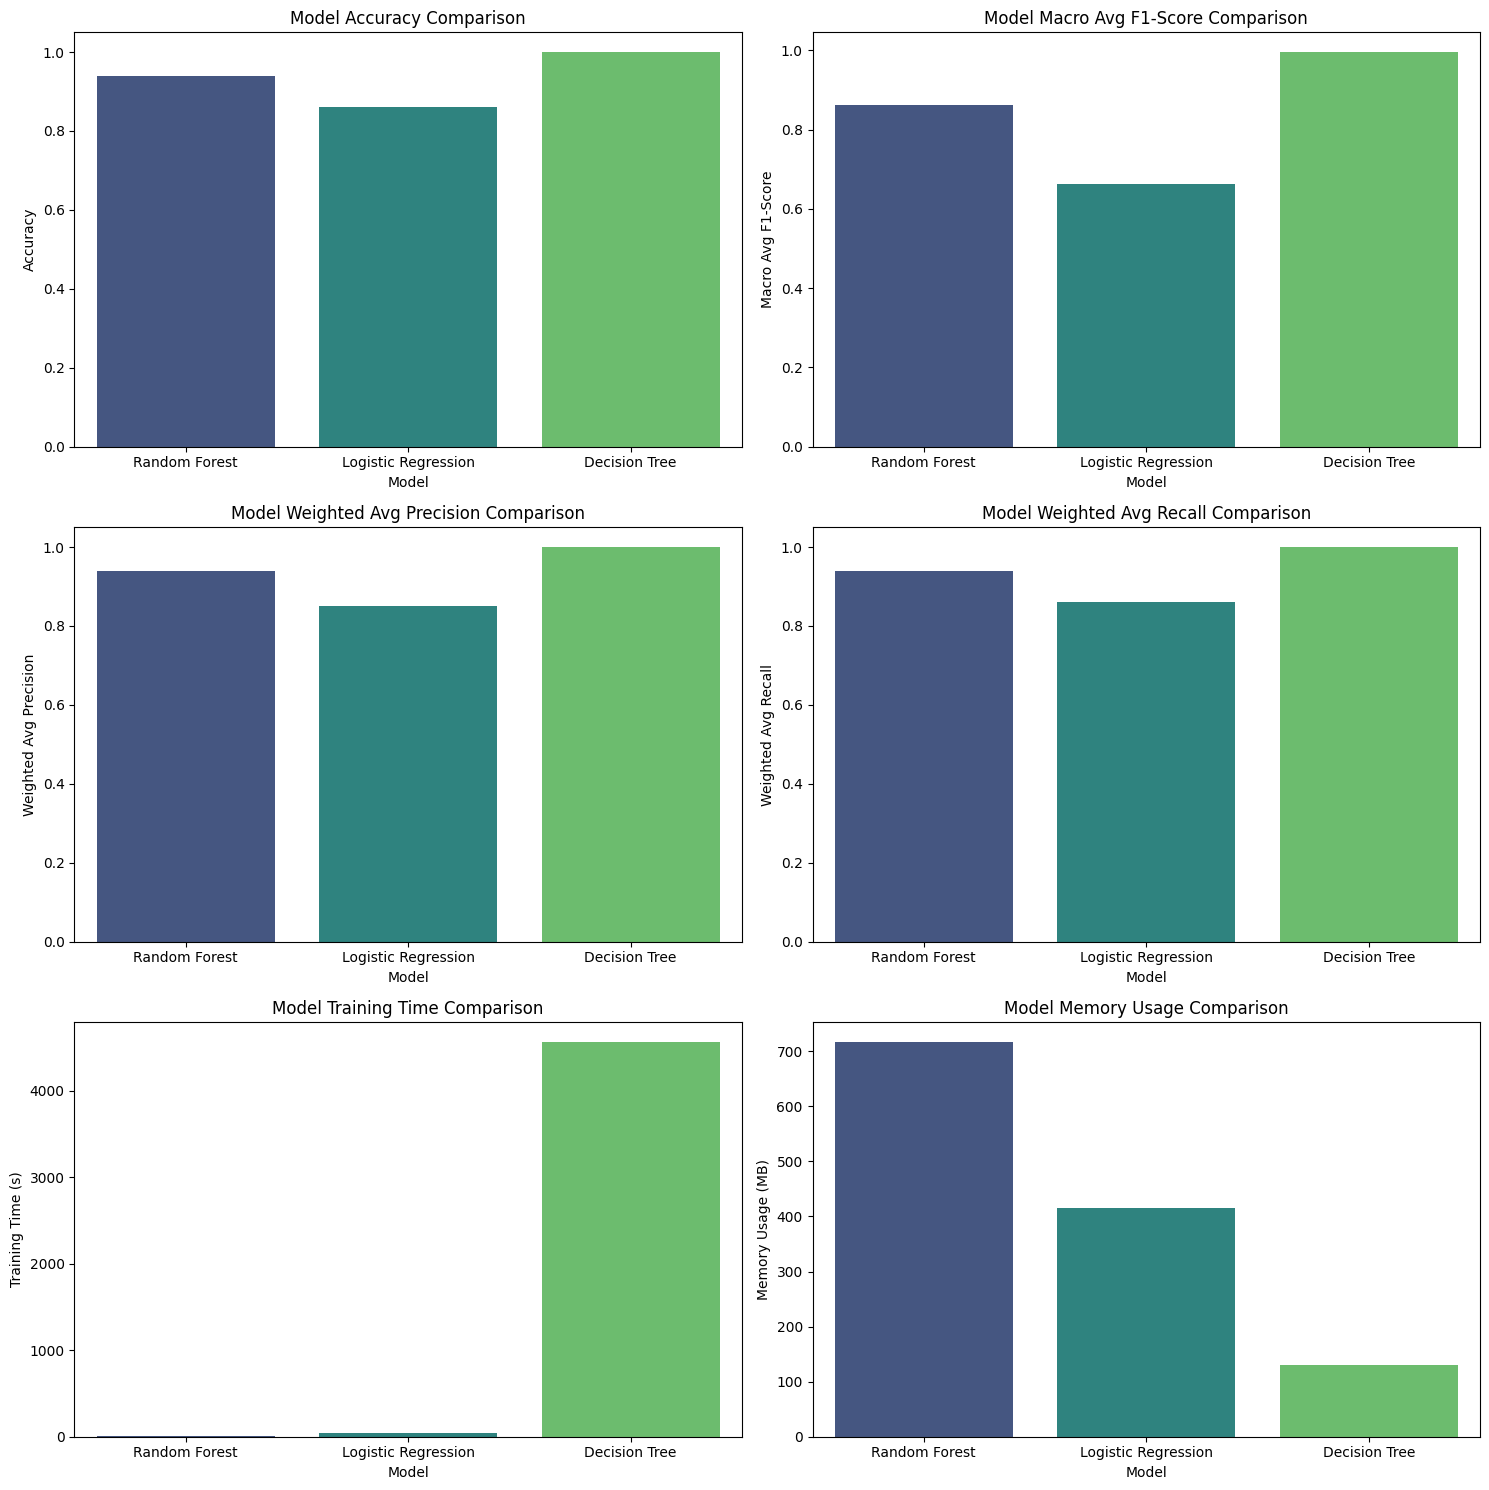

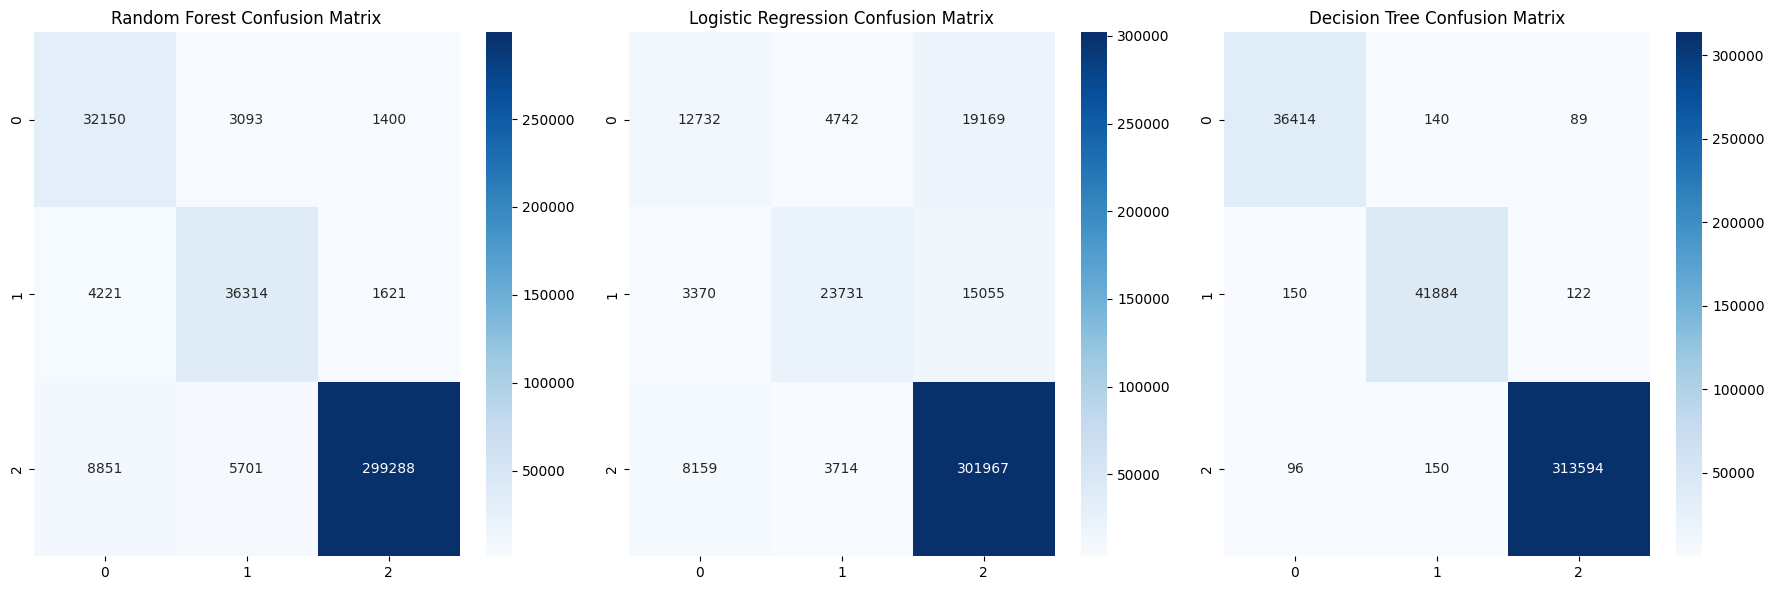

C:\Users\HP\AppData\Local\Temp\ipykernel_7924\938753014.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Time per Accuracy (s)', data=df, ax=axes[0], palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_7924\938753014.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Memory per Accuracy (MB)', data=df, ax=axes[1], palette="viridis")


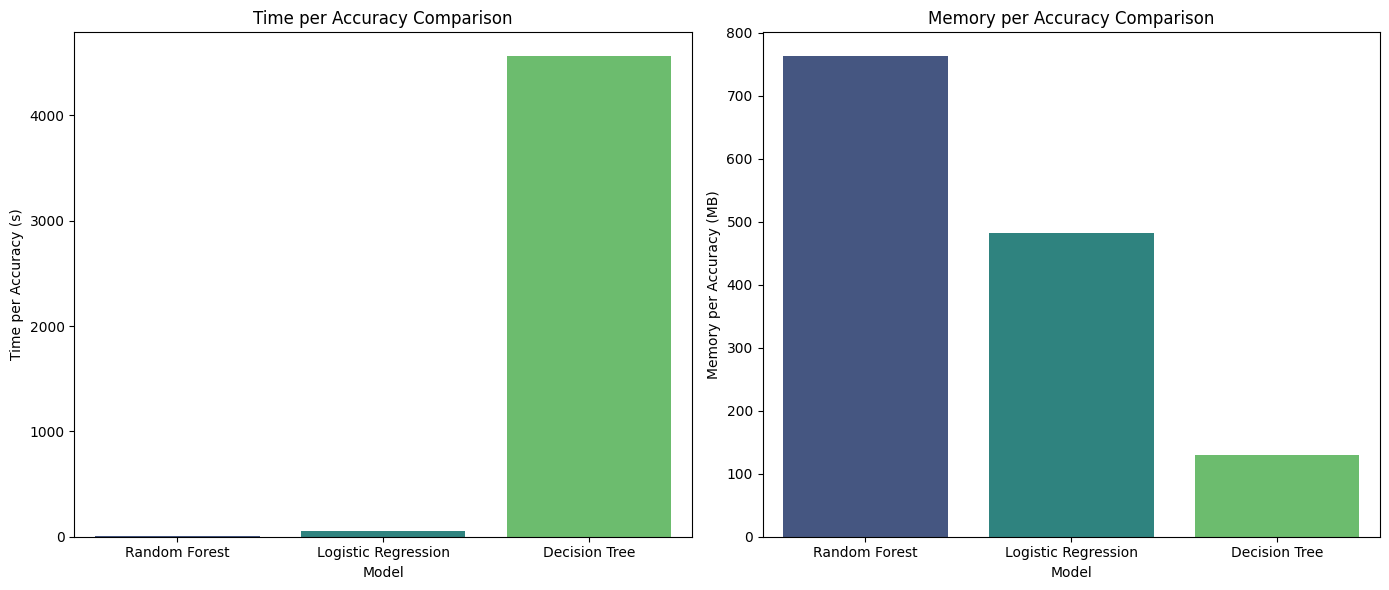

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest results as dictionaries
random_forest_report = {
    "accuracy": 0.94,
    "macro avg": {"precision": 0.8353, "recall": 0.8975, "f1-score": 0.8631},
    "weighted avg": {"precision": 0.94, "recall": 0.94, "f1-score": 0.94},
    "Training Time (s)": 4.58,
    "Memory Usage (MB)": 716.82,
    "Confusion Matrix": np.array([[32150, 3093, 1400], [4221, 36314, 1621], [8851, 5701, 299288]])
}

# Logistic Regression results as dictionaries
logistic_regression_report = {
    "accuracy": 0.86,
    "macro avg": {"precision": 0.7201, "recall": 0.6242, "f1-score": 0.6619},
    "weighted avg": {"precision": 0.85, "recall": 0.86, "f1-score": 0.85},
    "Training Time (s)": 45.06,
    "Memory Usage (MB)": 414.65,
    "Confusion Matrix": np.array([[12732, 4742, 19169], [3370, 23731, 15055], [8159, 3714, 301967]])
}

# Decision Tree results as dictionaries
decision_tree_report = {
    "accuracy": 1.00,
    "macro avg": {"precision": 0.9952, "recall": 0.9955, "f1-score": 0.9954},
    "weighted avg": {"precision": 1.00, "recall": 1.00, "f1-score": 1.00},
    "Training Time (s)": 4561.10,
    "Memory Usage (MB)": 129.75,
    "Confusion Matrix": np.array([[36414, 140, 89], [150, 41884, 122], [96, 150, 313594]])
}

# Creating a DataFrame for better visualization
data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree"],
    "Accuracy": [random_forest_report["accuracy"], logistic_regression_report["accuracy"], decision_tree_report["accuracy"]],
    "Macro Avg Precision": [random_forest_report["macro avg"]["precision"], logistic_regression_report["macro avg"]["precision"], decision_tree_report["macro avg"]["precision"]],
    "Macro Avg Recall": [random_forest_report["macro avg"]["recall"], logistic_regression_report["macro avg"]["recall"], decision_tree_report["macro avg"]["recall"]],
    "Macro Avg F1-Score": [random_forest_report["macro avg"]["f1-score"], logistic_regression_report["macro avg"]["f1-score"], decision_tree_report["macro avg"]["f1-score"]],
    "Weighted Avg Precision": [random_forest_report["weighted avg"]["precision"], logistic_regression_report["weighted avg"]["precision"], decision_tree_report["weighted avg"]["precision"]],
    "Weighted Avg Recall": [random_forest_report["weighted avg"]["recall"], logistic_regression_report["weighted avg"]["recall"], decision_tree_report["weighted avg"]["recall"]],
    "Weighted Avg F1-Score": [random_forest_report["weighted avg"]["f1-score"], logistic_regression_report["weighted avg"]["f1-score"], decision_tree_report["weighted avg"]["f1-score"]],
    "Training Time (s)": [random_forest_report["Training Time (s)"], logistic_regression_report["Training Time (s)"], decision_tree_report["Training Time (s)"]],
    "Memory Usage (MB)": [random_forest_report["Memory Usage (MB)"], logistic_regression_report["Memory Usage (MB)"], decision_tree_report["Memory Usage (MB)"]],
    "Time per Accuracy (s)": [random_forest_report["Training Time (s)"]/random_forest_report["accuracy"], logistic_regression_report["Training Time (s)"]/logistic_regression_report["accuracy"], decision_tree_report["Training Time (s)"]/decision_tree_report["accuracy"]],
    "Memory per Accuracy (MB)": [random_forest_report["Memory Usage (MB)"]/random_forest_report["accuracy"], logistic_regression_report["Memory Usage (MB)"]/logistic_regression_report["accuracy"], decision_tree_report["Memory Usage (MB)"]/decision_tree_report["accuracy"]]
}

df = pd.DataFrame(data)

# Print the DataFrame to compare
print("Comparison of Model Performance:")
print(df)

# Visualization using matplotlib and seaborn

# Create subplots for each metric category
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Accuracy
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Model Accuracy Comparison')

# Macro Avg F1-Score
sns.barplot(x='Model', y='Macro Avg F1-Score', data=df, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Model Macro Avg F1-Score Comparison')

# Weighted Avg Precision
sns.barplot(x='Model', y='Weighted Avg Precision', data=df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Model Weighted Avg Precision Comparison')

# Weighted Avg Recall
sns.barplot(x='Model', y='Weighted Avg Recall', data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Model Weighted Avg Recall Comparison')

# Training Time
sns.barplot(x='Model', y='Training Time (s)', data=df, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title('Model Training Time Comparison')

# Memory Usage
sns.barplot(x='Model', y='Memory Usage (MB)', data=df, ax=axes[2, 1], palette="viridis")
axes[2, 1].set_title('Model Memory Usage Comparison')

plt.tight_layout()
plt.show()

# Confusion Matrix Heatmaps
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(random_forest_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')

sns.heatmap(logistic_regression_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(decision_tree_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

# Additional Comparison of Time and Memory per Accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='Time per Accuracy (s)', data=df, ax=axes[0], palette="viridis")
axes[0].set_title('Time per Accuracy Comparison')

sns.barplot(x='Model', y='Memory per Accuracy (MB)', data=df, ax=axes[1], palette="viridis")
axes[1].set_title('Memory per Accuracy Comparison')

plt.tight_layout()
plt.show()